In [6]:
from pathlib import Path

nas100_results_dir = Path('./results/NAS100')
dow30_results_dir = Path('./results/DOW30')
crypto10_results_dir = Path('./results/CRYPTO10DAILY/')

In [7]:
import json
import pandas as pd

results_dict = {'dataset': [], 'model': [], 'hidden': [], '$\delta_d$': [], 'ARP': [], 'AVOL': [], 'ASR': [], 'CR': [], 'MDD': []}
def get_results_deltad(results_dir, results_dict, dataset='NAS100', hidden_size='128,32'):
    for res_path in results_dir.iterdir():
        stems = res_path.stem.split('_')
        if stems[0] == 'riskcontrol':
            continue
        if stems[0] != 'LSTMHADW':
            continue
        if stems[1] != hidden_size:
            continue
        if stems[5] != 'downsiderisk':
            continue
        if stems[6] != 'False':
            continue
        model_name = stems[0]
        hidden_size = stems[1]
        delta_d = float(stems[8])
        with open(res_path, 'r') as f:
            results = json.load(f)
        results_dict['dataset'].append(dataset)
        results_dict['model'].append(model_name)
        results_dict['hidden'].append(hidden_size)
        results_dict['$\delta_d$'].append(delta_d)
        results_dict['ARP'].append(results['Annual return'])
        results_dict['AVOL'].append(results['Annual volatility'])
        results_dict['ASR'].append(results['Sharpe ratio'])
        results_dict['CR'].append(results['Calmar ratio'])
        results_dict['MDD'].append(results['Max drawdown'])
    results_df = pd.DataFrame(results_dict)
    return results_df
get_results_deltad(dow30_results_dir, results_dict, 'DOW30', hidden_size='64,32')
get_results_deltad(nas100_results_dir, results_dict, 'NAS100', hidden_size='128,32')
results_df = get_results_deltad(crypto10_results_dir, results_dict, 'Crypto10', hidden_size='64,32')

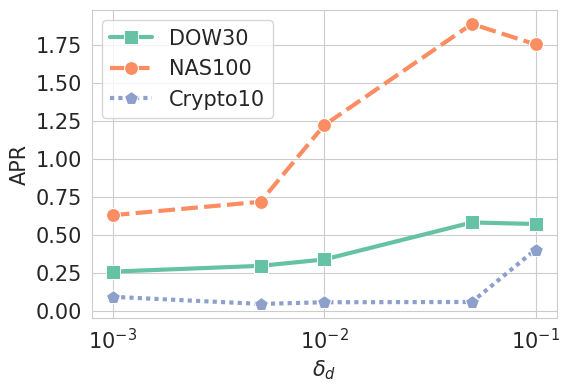

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('Set2')

figsize=(6,4)
plt.figure(figsize=figsize)
sns.lineplot(data=results_df, x='$\delta_d$', y='ARP', hue='dataset', style='dataset', markers=['s', 'o', 'p'], linewidth=3, markersize=10)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('APR', fontsize=15)
plt.xlabel('$\delta_d$', fontsize=15)
plt.xscale("log")
# plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
# plt.show()
plt.savefig('./plotted_figs/ALL_deltad_APR.pdf', bbox_inches='tight')

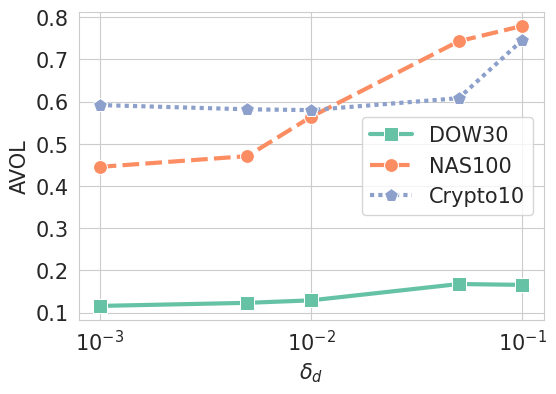

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

plt.figure(figsize=figsize)
sns.lineplot(data=results_df, x='$\delta_d$', y='AVOL', hue='dataset', style='dataset', markers=['s', 'o', 'p'], linewidth=3, markersize=10)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('AVOL', fontsize=15)
plt.xlabel('$\delta_d$', fontsize=15)
plt.xscale("log")
# plt.ticklabel_format(axis='x', style='sci', scilimits=[0, 2])
# plt.show()
plt.savefig('./plotted_figs/ALL_deltad_AVOL.pdf', bbox_inches='tight')

In [5]:
results_df

,dataset,model,hidden,$\delta_d$,ARP,AVOL,ASR,CR,MDD
0,DOW30,LSTMHADW,"64,32",0.005,0.297272,0.122977,2.178903,4.705103,-0.063181
1,DOW30,LSTMHADW,"64,32",0.010,0.338983,0.128883,2.330623,4.601300,-0.073671
2,DOW30,LSTMHADW,"64,32",0.050,0.582150,0.167576,2.823613,6.875169,-0.084674
3,DOW30,LSTMHADW,"64,32",0.100,0.571993,0.165556,2.817081,6.829740,-0.083750
4,DOW30,LSTMHADW,"64,32",0.001,0.259271,0.115674,2.051661,4.408690,-0.058809
5,NAS100,LSTMHADW,"128,32",0.050,1.885866,0.743033,1.777921,5.976749,-0.315534
6,NAS100,LSTMHADW,"128,32",0.005,0.717895,0.470757,1.383248,2.422865,-0.296300
7,NAS100,LSTMHADW,"128,32",0.001,0.629874,0.445212,1.319678,1.958539,-0.321604
8,NAS100,LSTMHADW,"128,32",0.010,1.220681,0.563857,1.691751,4.083233,-0.298950
9,NAS100,LSTMHADW,"128,32",0.100,1.751374,0.779324,1.666055,4.931704,-0.355126
